# CS109A - Final Project - Milestone 3

# Canvas Group - Final Project # 150

# Group Members - Akhil Srivastava, Han Truong, Yuying Qian

# Exploratory Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Used to parse 'Date Time' column values as pandas DatetimeIndex
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

## Setup Data Pipeline

In [2]:
# Reads Data Downloaded from Yahoo!
def read_yahoo_data(file_name):
    # Read the file and parse 'Date' column values as pandas DatetimeIndex
    df = pd.read_csv(file_name, parse_dates=['Date'], date_parser=dateparse)

    # Set 'Date' column as index
    df.set_index('Date', inplace=True)

    # Drop 'Adj Close' and 'Volume' columns as they are not needed
    df = df.drop(['Adj Close', 'Volume'], 1) 
    
    return df

# Reads Data Downloaded from Bloomberg
def read_bloomberg_data(file_name):
    # Read the file and parse 'DATE' column values as pandas DatetimeIndex
    df = pd.read_csv(file_name, parse_dates=['DATE'], date_parser=dateparse)
    
    df.columns = ['Date','Open','High','Low','Close','Volume']

    # Set 'Date' column as index
    df.set_index('Date', inplace=True)

    # Drop 'Volume' columns as they are not needed
    df = df.drop(['Volume'], 1)
    
    return df

In [3]:
# Specify Security Names, Data Dir Name, File Names and Data Reader Function
yahoo_security_list = ['Apple Stock', 'Amazon Stock', 'Microsoft Stock', 'S&P 500 Index', 'Nasdaq 100 Index']
yahoo_data_dir = './yahoo_full_data/'
yahoo_file_list = ['AAPL.csv', 'AMZN.csv', 'MSFT.csv', '^GSPC.csv', '^IXIC.csv']

bloomberg_security_list = ['Apple Stock', 'Microsoft Stock', 'S&P 500 Index', 'Nasdaq 100 Index']
bloomberg_data_dir = './data/'
bloomberg_file_list = ['Apple.csv', 'Microsoft.csv', 'SP500.csv', 'NASDAQ100.csv']

security_list = bloomberg_security_list
data_dir = bloomberg_data_dir
file_list = bloomberg_file_list
data_reader = read_bloomberg_data

## Functions to Display Summary Statistics, Price Charts and ACF & PACF Charts

In [4]:
# Displays Summary Statistics and Top and Bottom Rows
def describe_and_peek(df, security_name):
    print("\nNumber of observations:", len(df.index), "\n")    
    print(security_name, "- Summary Statistics\n\n", df.describe(), "\n")
    print(security_name, "- Top Rows\n\n", df.head(), "\n")
    print(security_name, "- Bottom Rows\n\n", df.tail(), "\n")

# Displays Price Charts
def display_price_charts(df, security_name, price_type, unit):    
    title =  price_type + security_name + " Daily Price" +  " (in " + unit + ")"
    columns = df.columns.values
    nrows = len(df.columns)//2
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, figsize=(18, 8*nrows))
    fig.suptitle(title, y=0.95, size=18)
    plt.subplots_adjust(wspace = 0.13, hspace = 0.3)

    for i in range(len(columns)):
        row = i//2
        column = i%2
        
        ax[row, column].plot(df.index, df[columns[i]], "-o", ms='1', color=np.random.rand(3,))
        ax[row, column].set_title(price_type + columns[i] + " Price", fontsize=18)
        ax[row, column].set_xlabel("Date", fontsize=15)
        ax[row, column].grid(True);
        
    plt.show()

# Displays ACF and PACF Charts
def plot_acf_pacf(df, security_name, price_type):    
    h_max = 60 
    title =  "ACF and PACF of " + price_type + security_name + " Daily Price"
    columns = df.columns.values

    fig, ax = plt.subplots(nrows=len(columns), ncols=2, sharex=False, figsize=(18, 8*len(columns)))
    ax = ax.reshape(-1, 2)
    fig.suptitle(title, y=1, size=18)
    plt.subplots_adjust(wspace = 0.13, hspace = 0.3)
    
    for i in range(len(columns)):
        plot_acf(df[columns[i]], ax=ax[i, 0], lags=h_max, color='crimson')
        ax[i, 0].set_xlabel("lag", fontsize=15)
        ax[i, 0].set_ylabel("ACF", fontsize=15)
        ax[i, 0].set_title("ACF - " + price_type + columns[i] + " Price", fontsize=15)
        ax[i, 0].grid(True)

        plot_pacf(df[columns[i]], ax=ax[i, 1], lags=h_max, color='lightseagreen')
        ax[i, 1].set_xlabel("lag", fontsize=15)
        ax[i, 1].set_ylabel("PACF", fontsize=15)
        ax[i, 1].set_title("PACF - " + price_type + columns[i] + " Price", fontsize=15)
        ax[i, 1].grid(True)

    plt.show()

## Read the Data, Display Summary Statistics, Price Charts and ACF & PACF Charts


********************************* Processing Apple Stock *********************************

Number of observations: 7780 

Apple Stock - Summary Statistics

               Open         High          Low        Close
count  7780.000000  7780.000000  7780.000000  7780.000000
mean     12.319237    12.451167    12.185067    12.323061
std      20.202767    20.440275    19.958964    20.210208
min       0.115000     0.118000     0.114000     0.116000
25%       0.361750     0.369000     0.355000     0.362000
50%       1.489500     1.516500     1.467500     1.489500
75%      18.751750    18.947500    18.616250    18.773250
max     137.590000   137.980000   130.530000   134.180000 

Apple Stock - Top Rows

              Open   High    Low  Close
Date                                  
1990-01-02  0.315  0.335  0.313  0.333
1990-01-03  0.339  0.339  0.335  0.335
1990-01-04  0.342  0.346  0.333  0.336
1990-01-05  0.337  0.342  0.330  0.337
1990-01-08  0.335  0.339  0.330  0.339 

Apple Stock - Bot

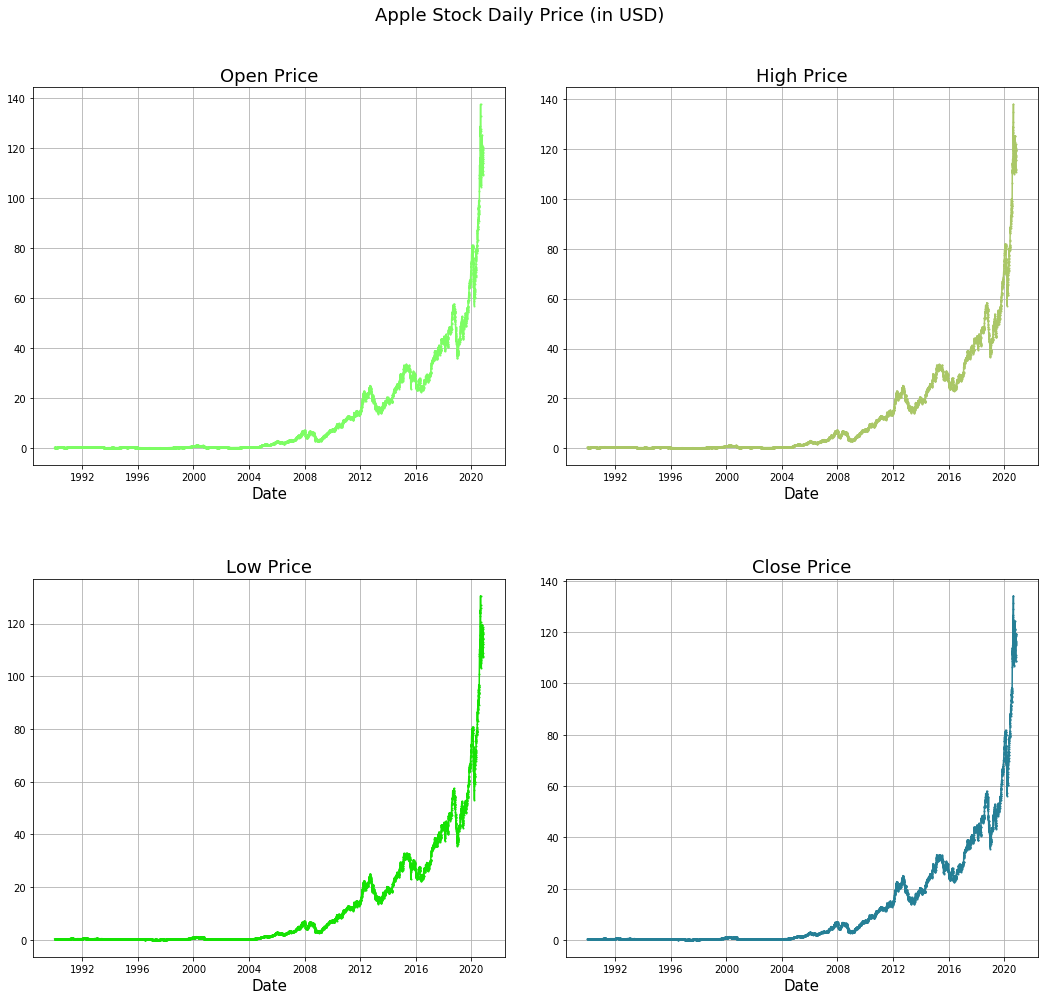

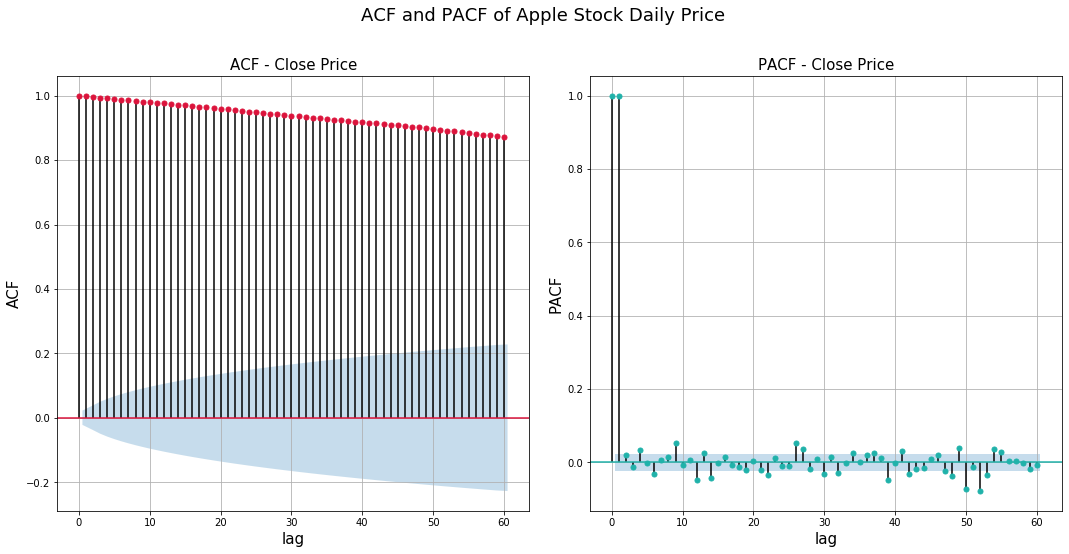

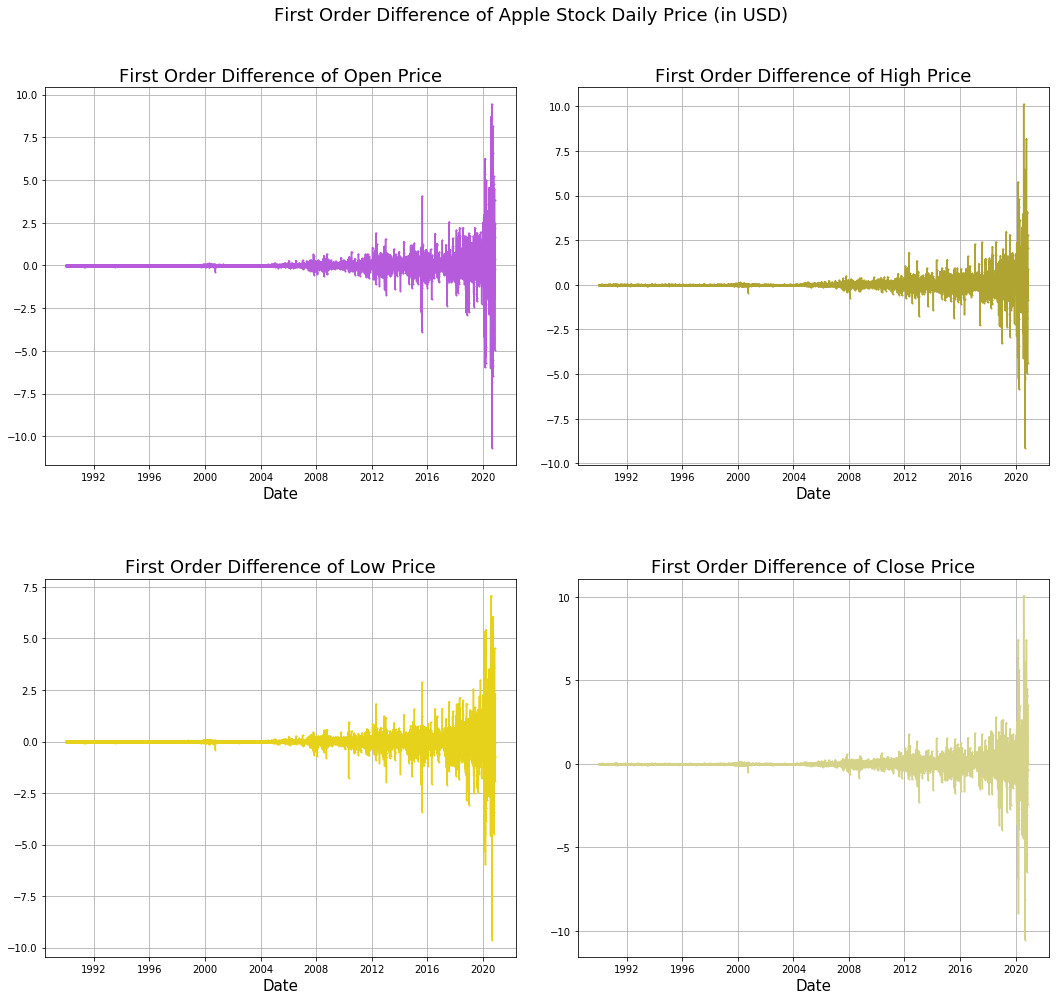

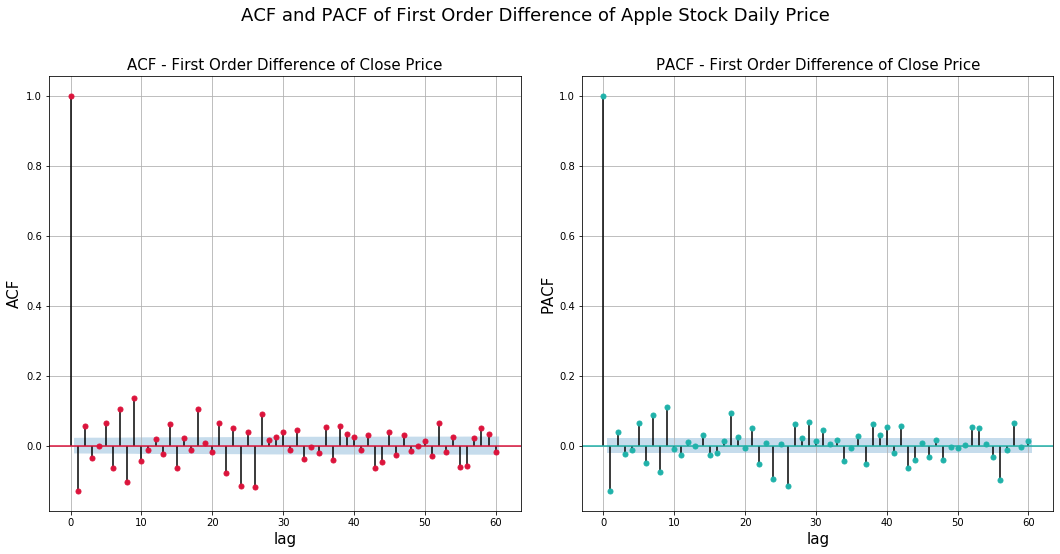

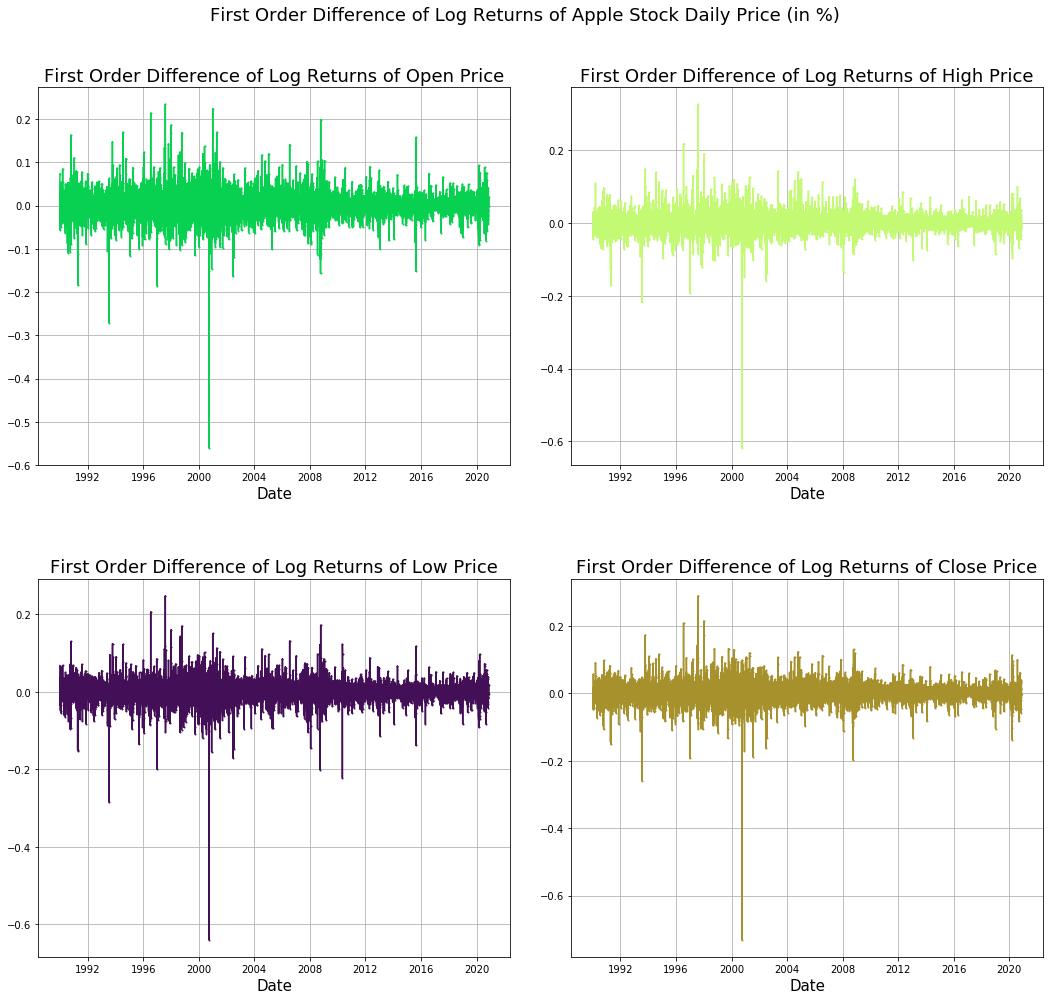

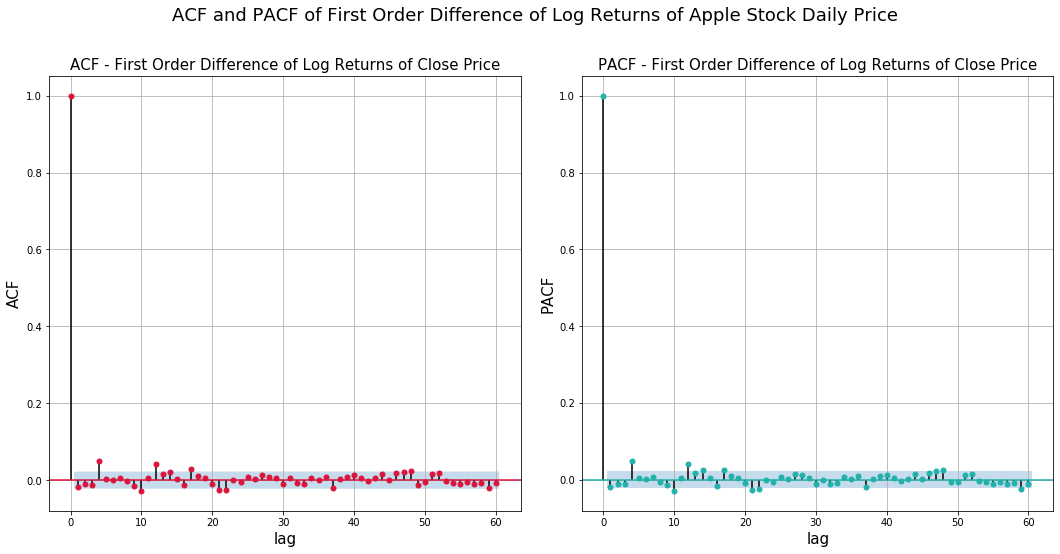


********************************* Processing Microsoft Stock *********************************

Number of observations: 7780 

Microsoft Stock - Summary Statistics

               Open         High          Low        Close
count  7780.000000  7780.000000  7780.000000  7780.000000
mean     36.183862    36.580446    35.779535    36.191097
std      38.516330    38.922780    38.077807    38.523138
min       0.591100     0.604200     0.585100     0.598100
25%      16.562500    16.824200    16.308600    16.531300
50%      27.340000    27.640000    27.122500    27.370000
75%      39.922500    40.250000    39.272825    39.750000
max     229.270000   232.860000   227.350000   231.650000 

Microsoft Stock - Top Rows

               Open    High     Low   Close
Date                                      
1990-01-02  0.6059  0.6163  0.5981  0.6163
1990-01-03  0.6215  0.6267  0.6146  0.6198
1990-01-04  0.6198  0.6389  0.6163  0.6380
1990-01-05  0.6354  0.6389  0.6215  0.6224
1990-01-08  0.6215  0.

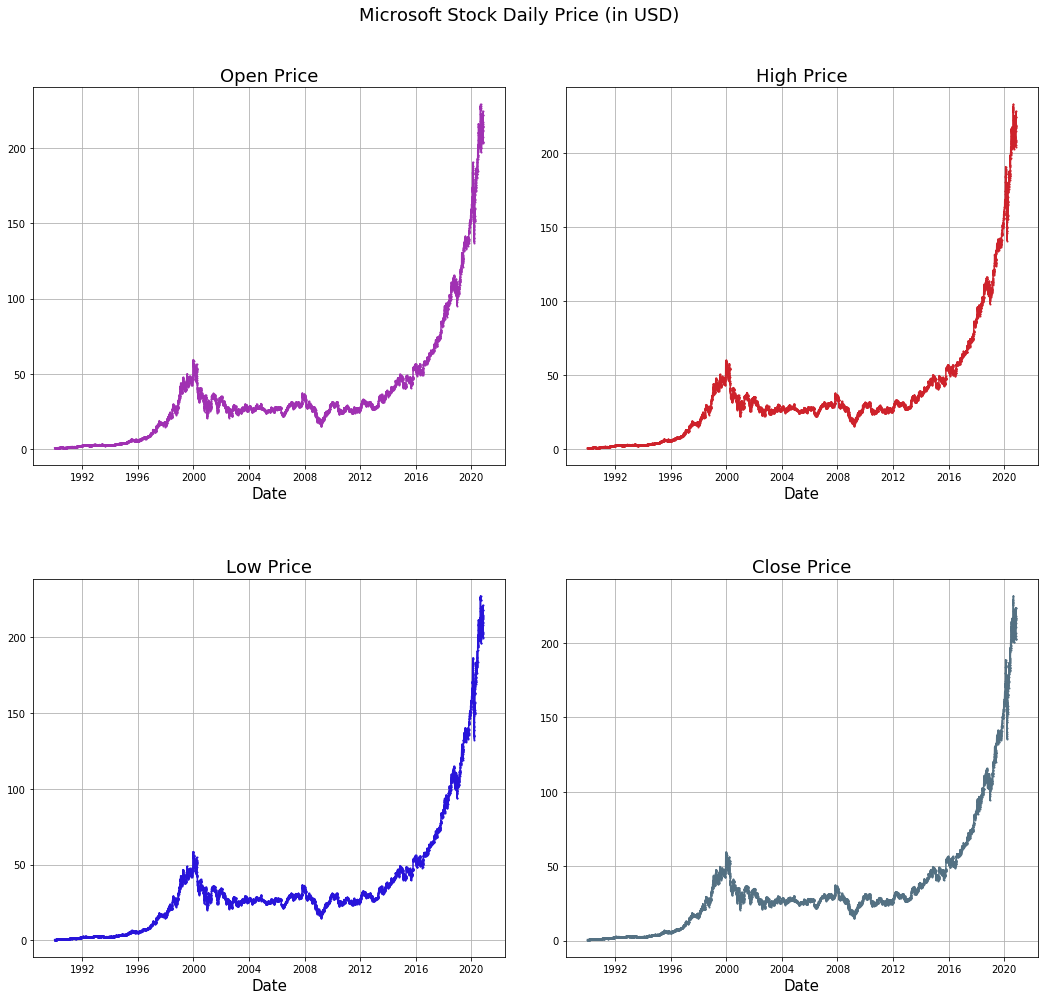

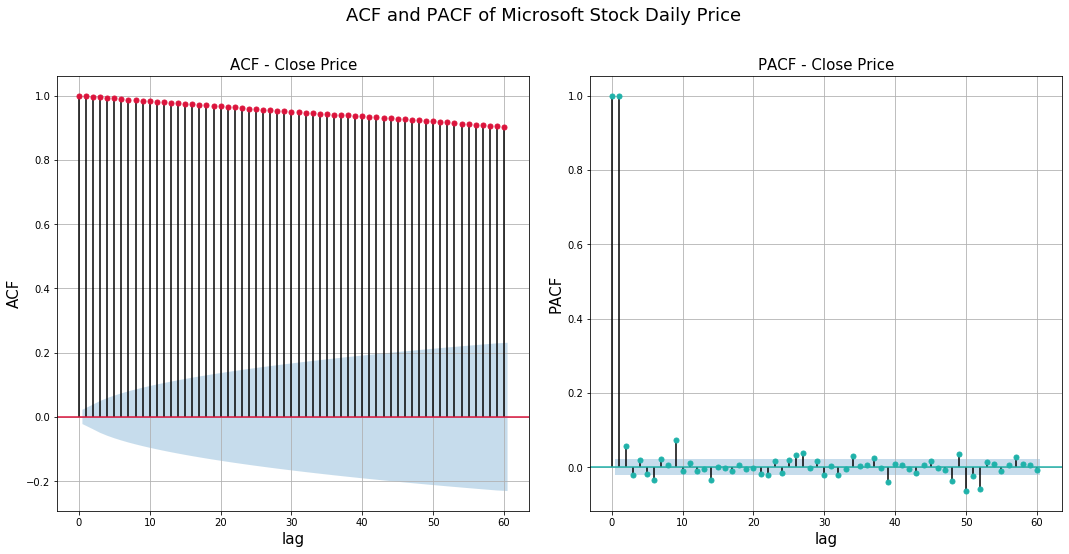

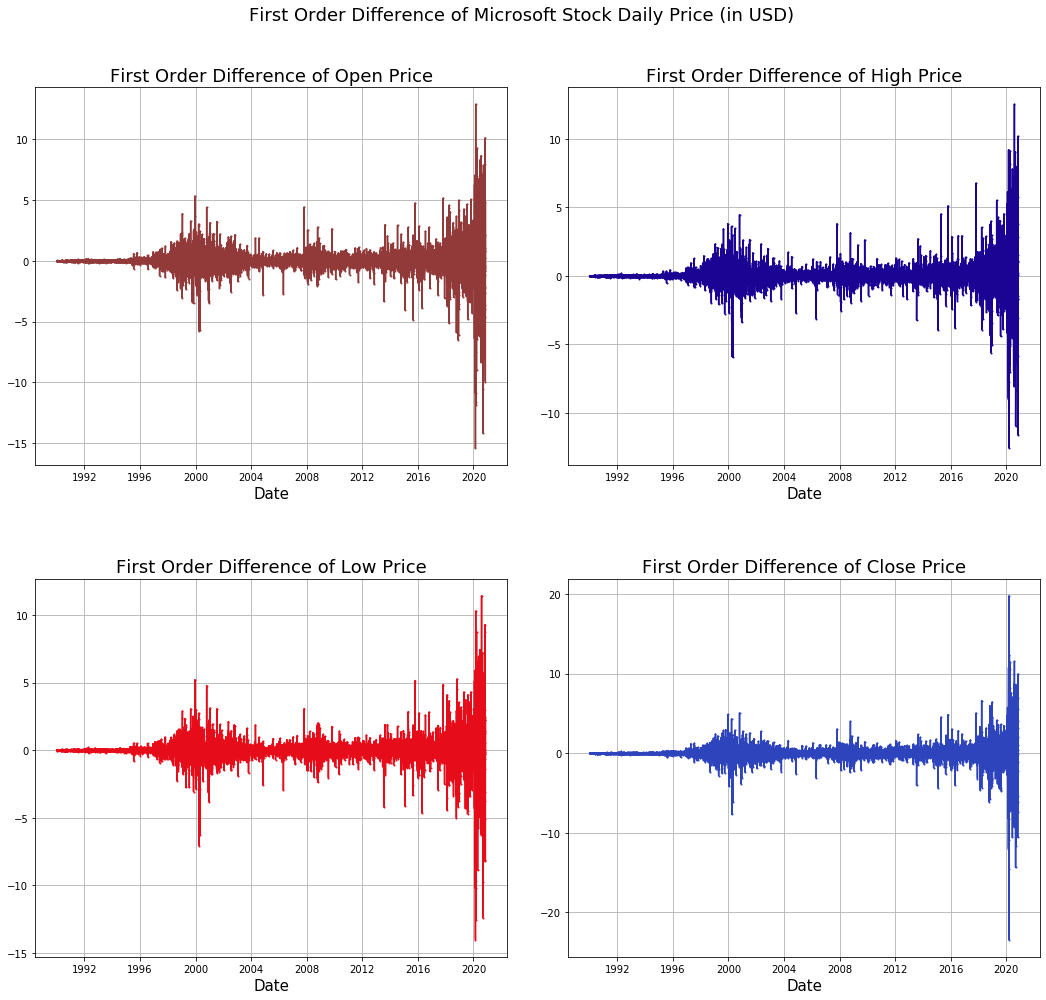

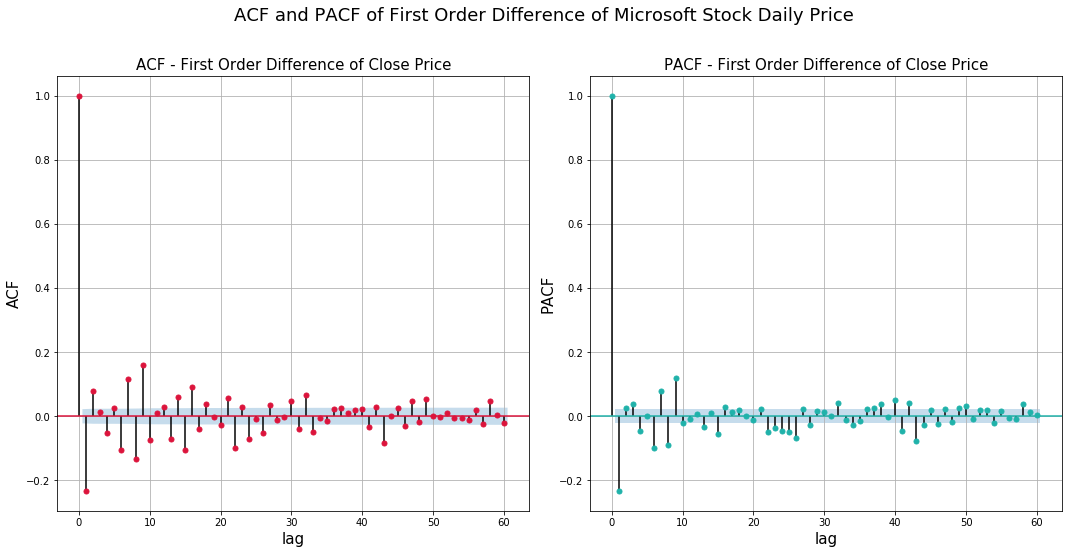

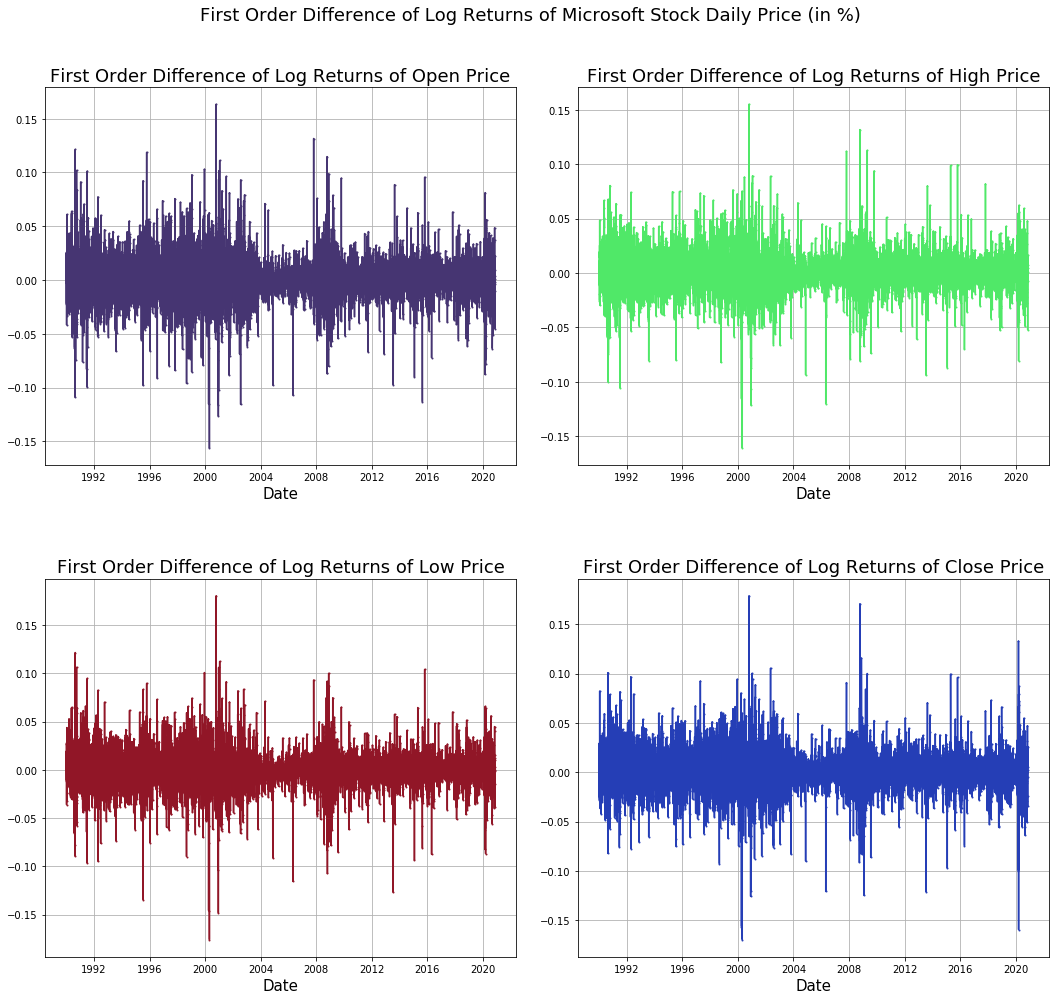

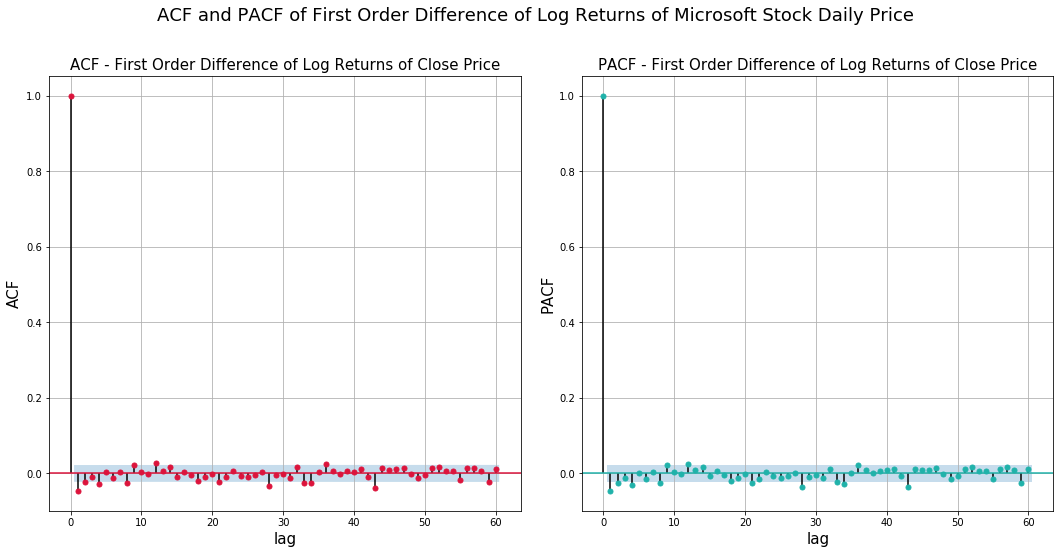


********************************* Processing S&P 500 Index *********************************

Number of observations: 7780 

S&P 500 Index - Summary Statistics

               Open         High          Low        Close
count  7780.000000  7780.000000  7780.000000  7780.000000
mean   1320.075084  1327.831652  1311.740373  1320.334039
std     734.695506   738.045308   730.963439   734.703988
min     295.450000   301.450000   294.510000   295.460000
25%     834.870000   844.372500   824.760000   835.287500
50%    1207.790000  1214.655000  1199.830000  1208.275000
75%    1547.942500  1555.230000  1540.972500  1549.372500
max    3583.040000  3645.990000  3557.000000  3585.150000 

S&P 500 Index - Top Rows

               Open    High     Low   Close
Date                                      
1990-01-02  353.39  359.69  351.98  359.69
1990-01-03  359.66  360.59  357.89  358.76
1990-01-04  358.74  358.76  352.89  355.67
1990-01-05  355.65  355.67  351.35  352.20
1990-01-08  352.19  354.24  

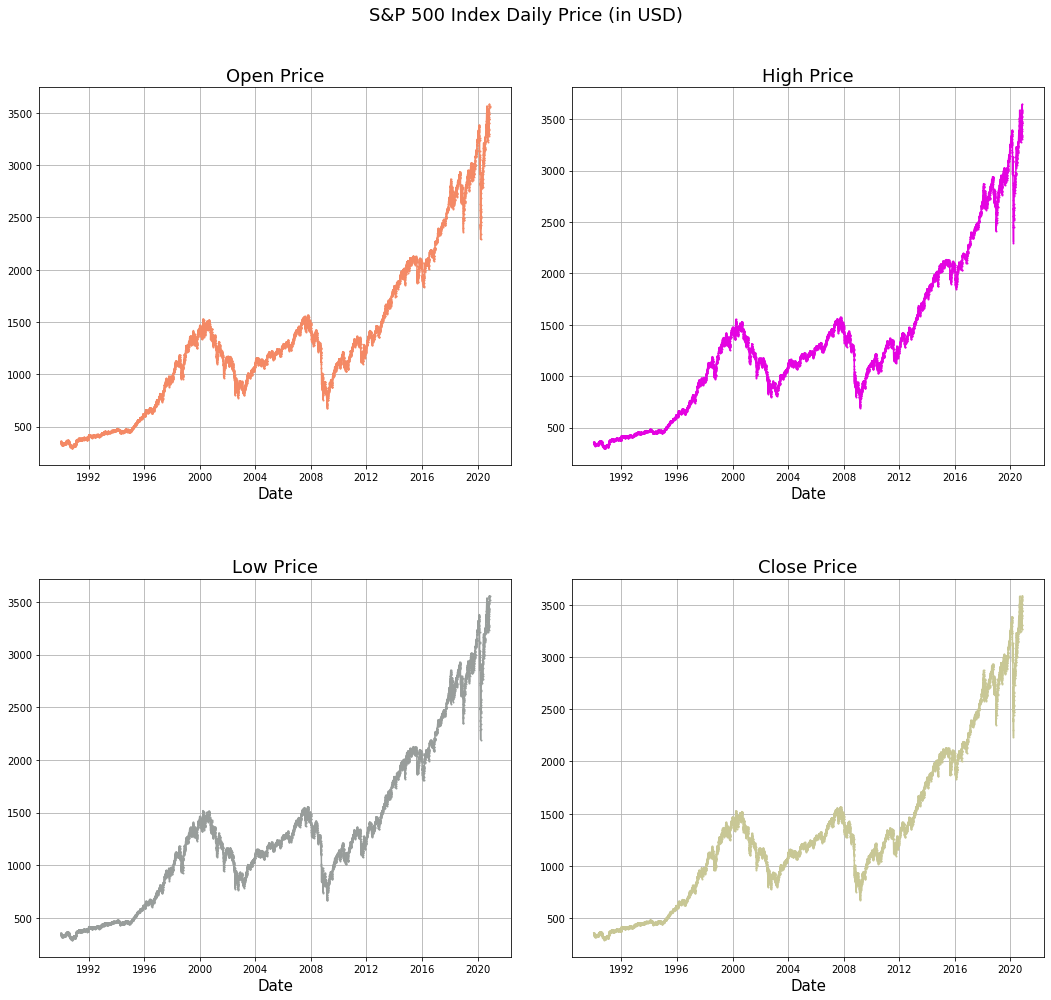

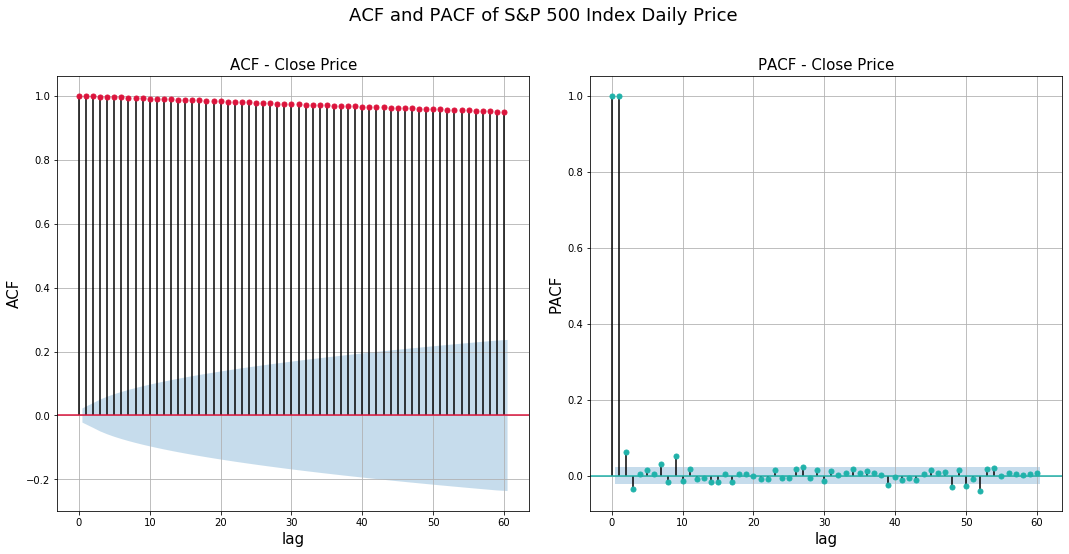

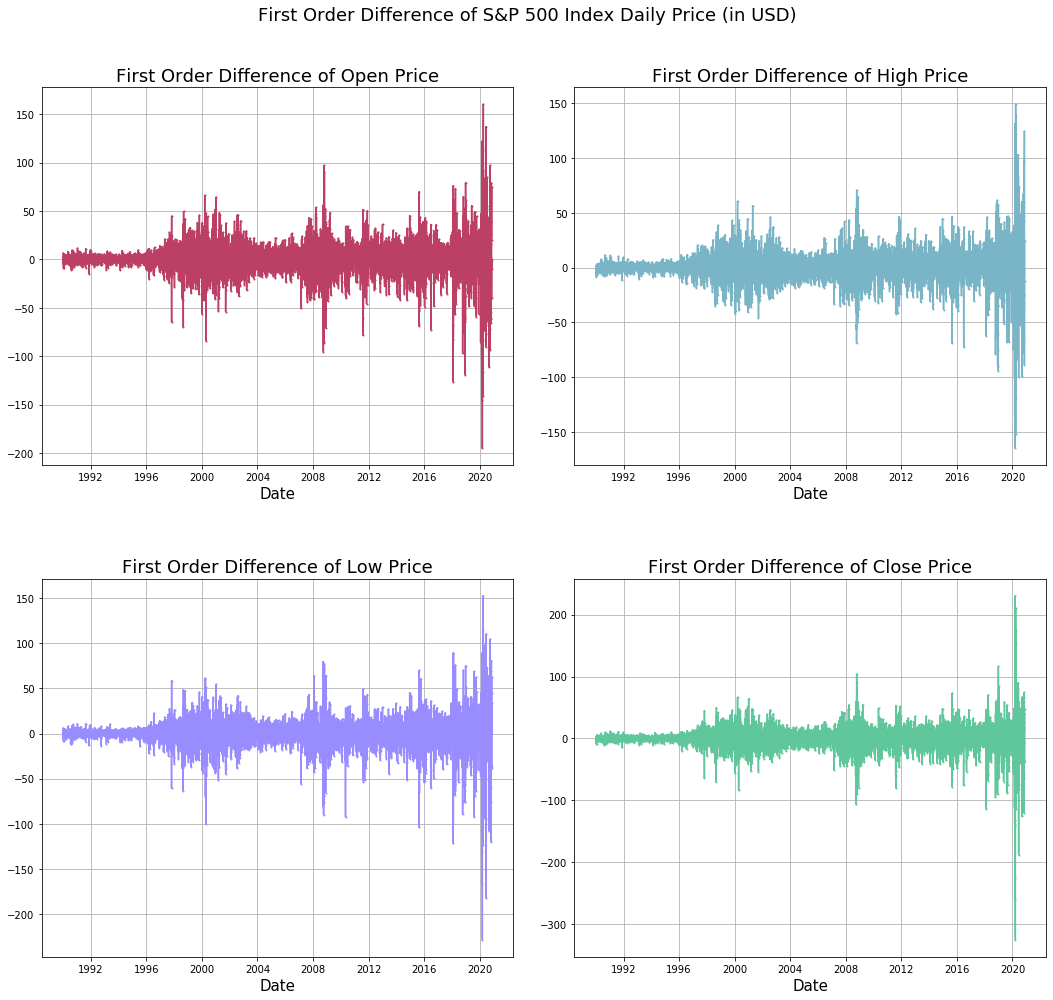

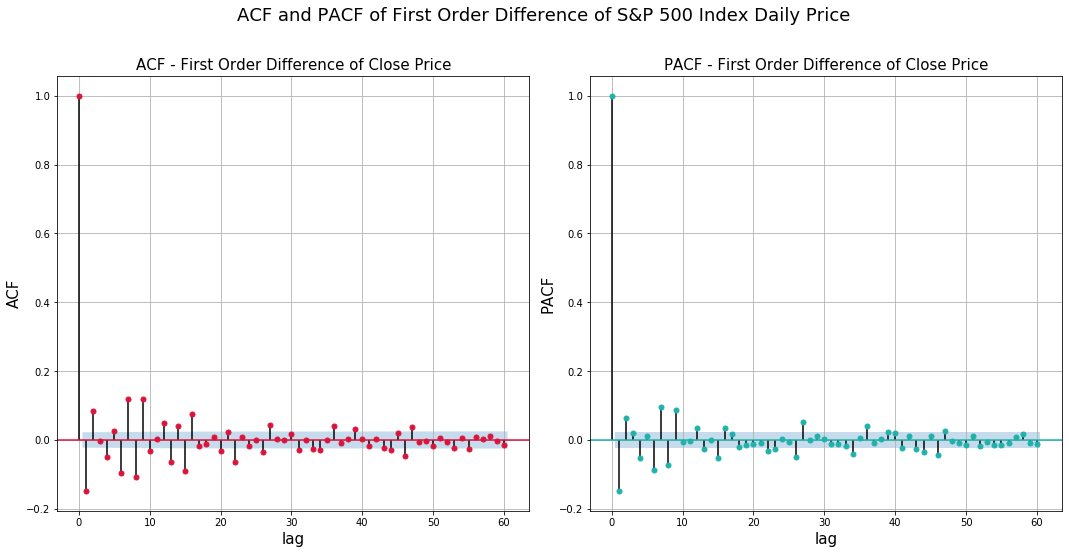

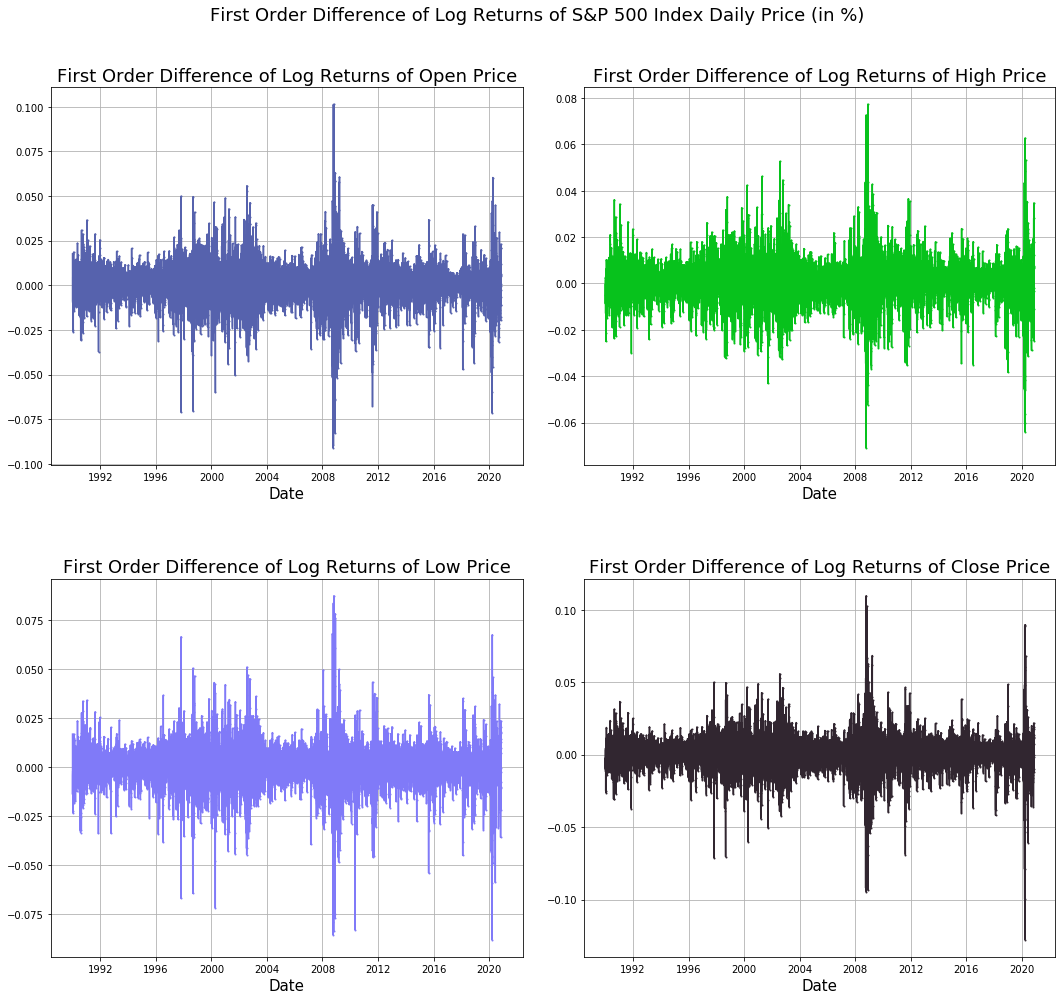

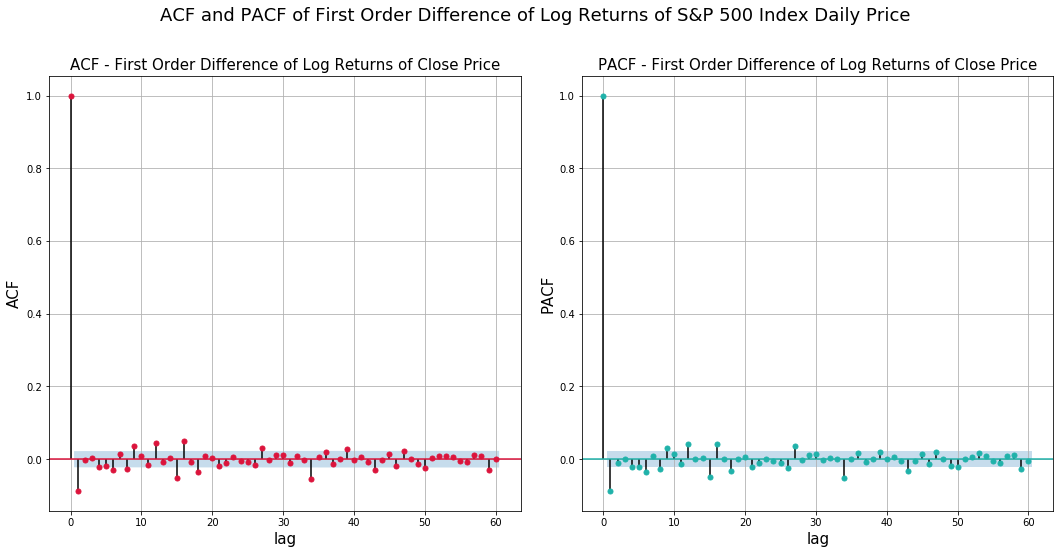


********************************* Processing Nasdaq 100 Index *********************************

Number of observations: 7780 

Nasdaq 100 Index - Summary Statistics

                Open          High           Low         Close
count   7780.000000   7780.000000   7780.000000   7780.000000
mean    2486.208572   2506.873474   2464.496373   2486.832112
std     2308.245536   2324.322938   2290.585624   2308.820942
min      165.190000    167.640000    162.550000    165.190000
25%      958.602500    975.662500    948.852500    962.785000
50%     1723.055000   1739.145000   1706.875000   1724.175000
75%     3420.192500   3472.867500   3371.870000   3422.005000
max    12417.450000  12439.480000  12176.180000  12420.540000 

Nasdaq 100 Index - Top Rows

               Open    High     Low   Close
Date                                      
1990-01-02  223.84  227.73  220.44  227.73
1990-01-03  227.73  228.94  226.10  226.10
1990-01-04  226.10  226.18  222.71  224.72
1990-01-05  224.72  224.80

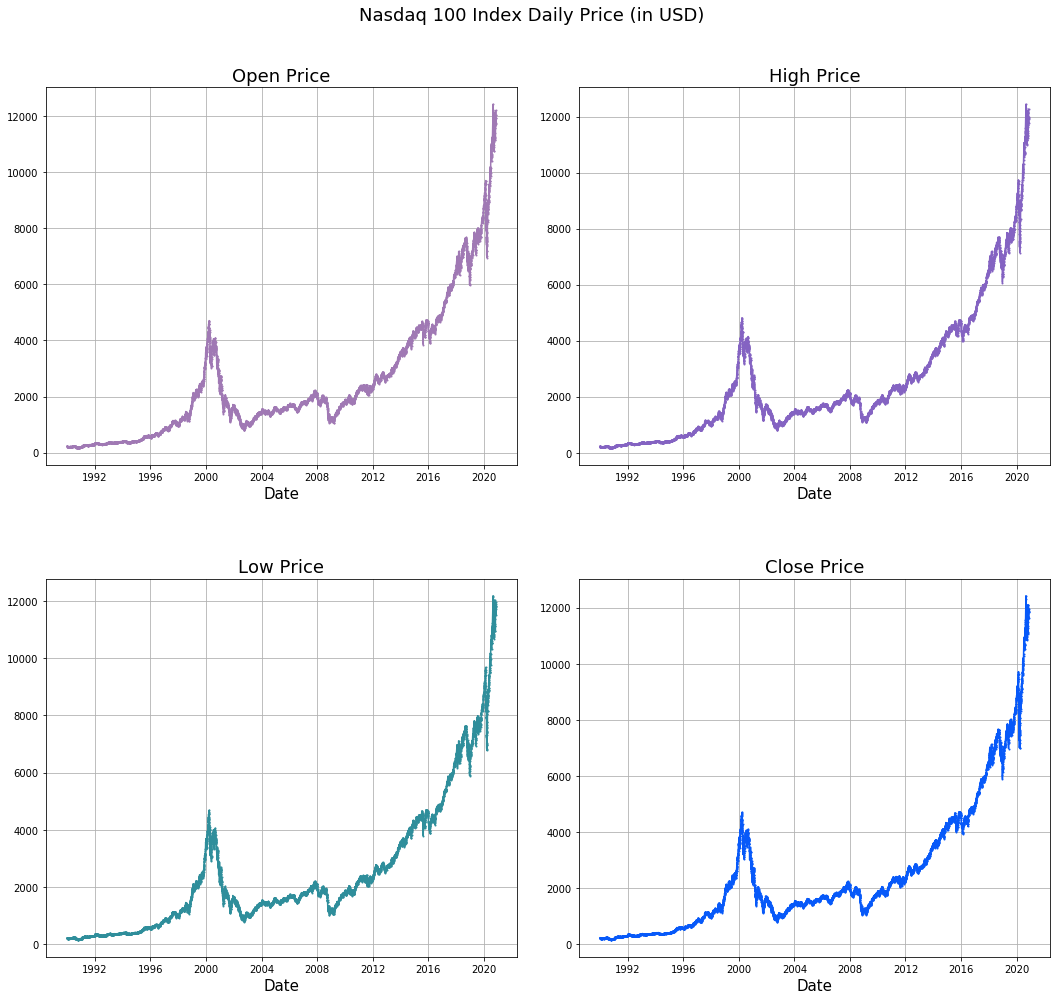

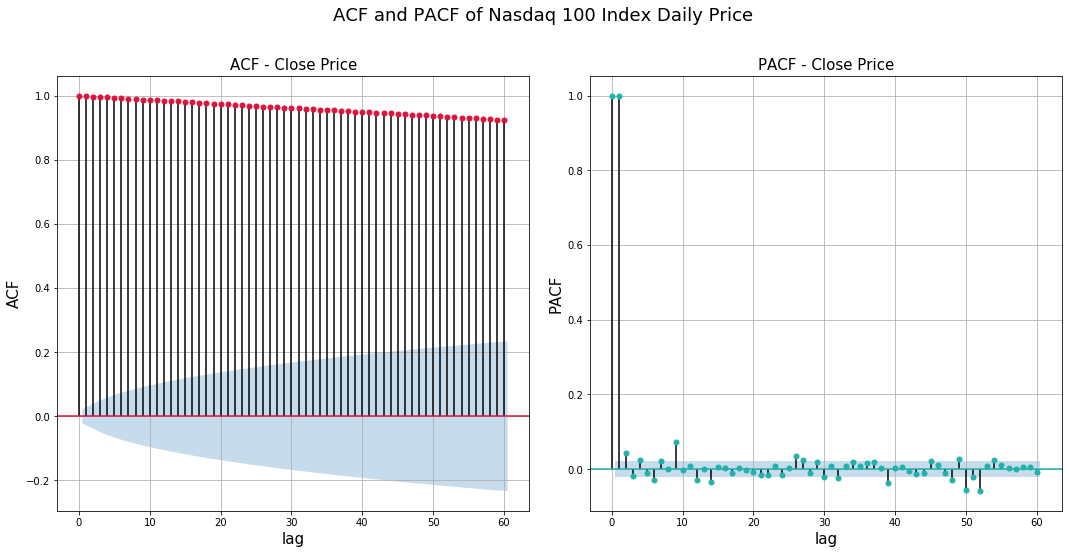

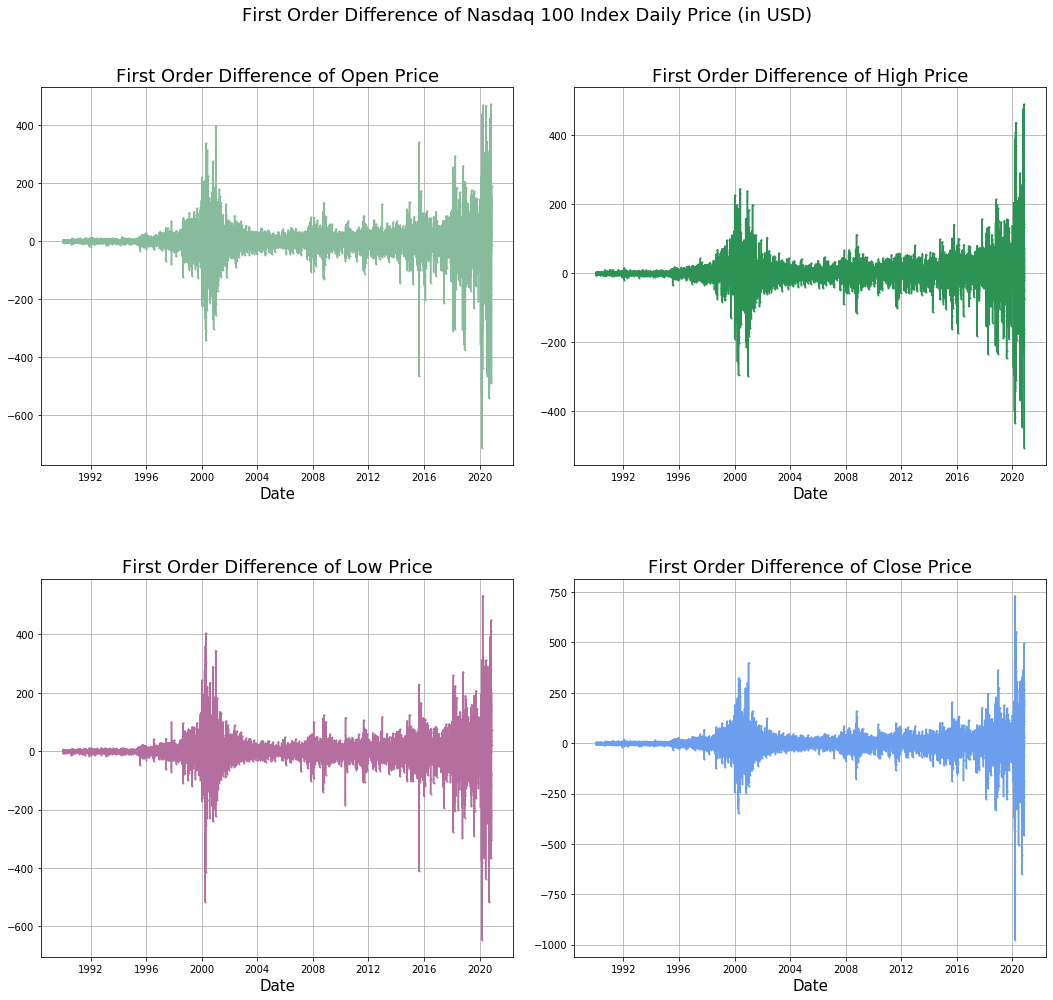

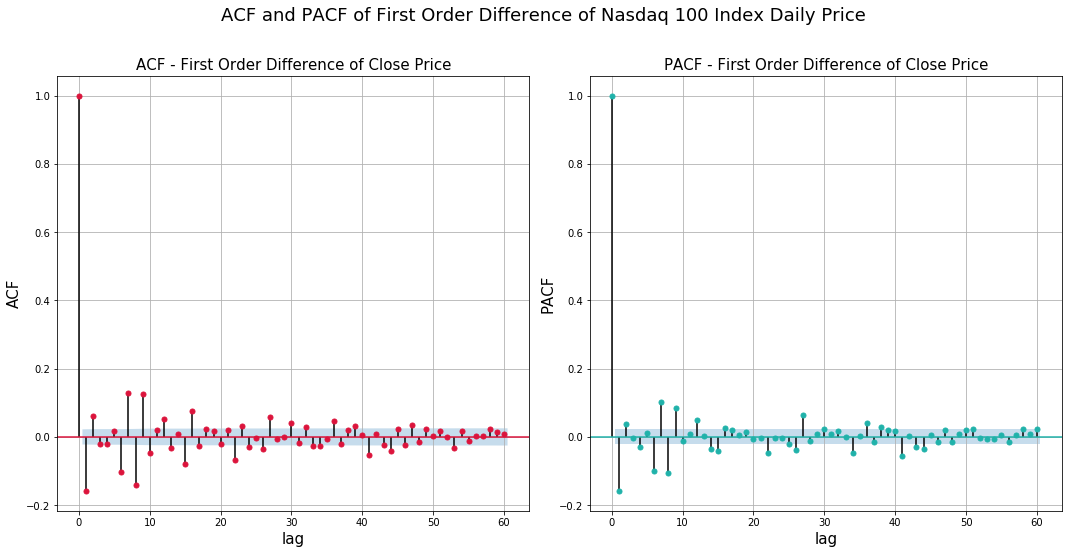

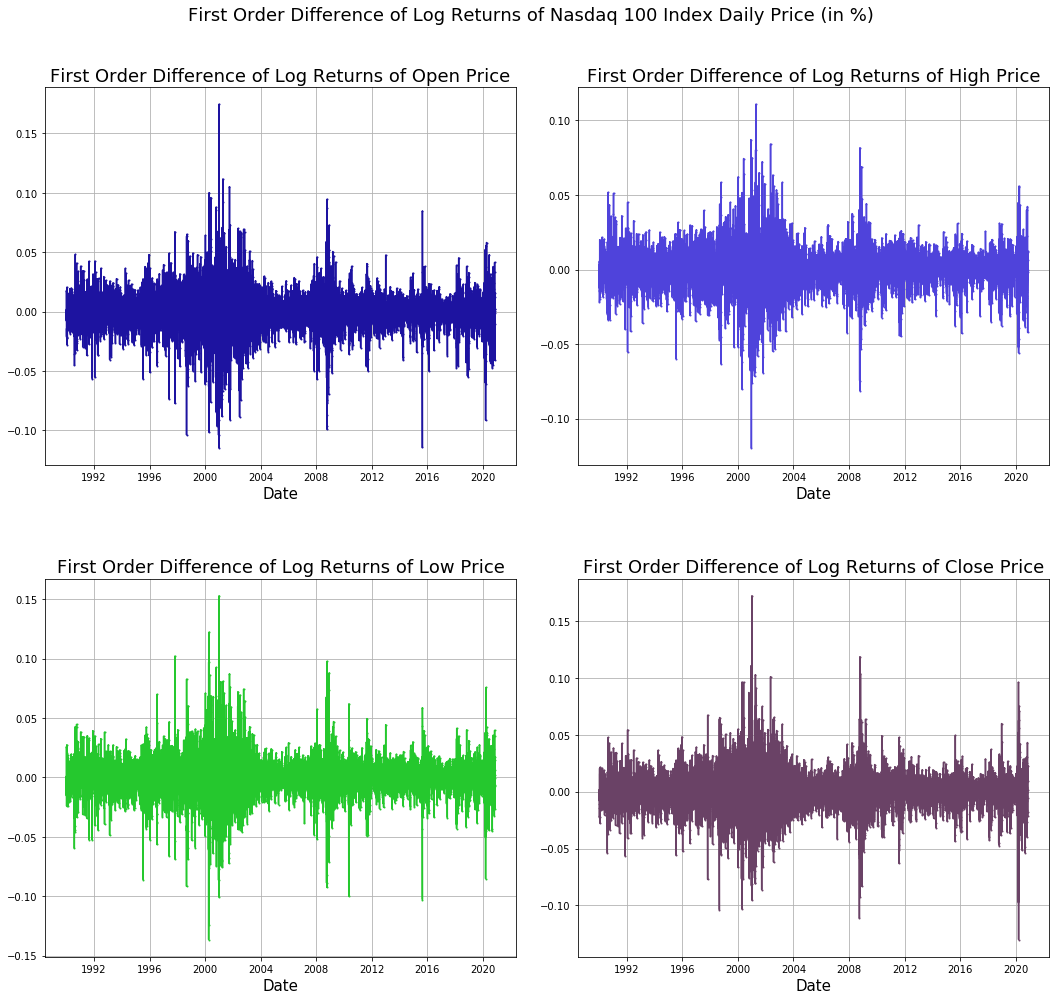

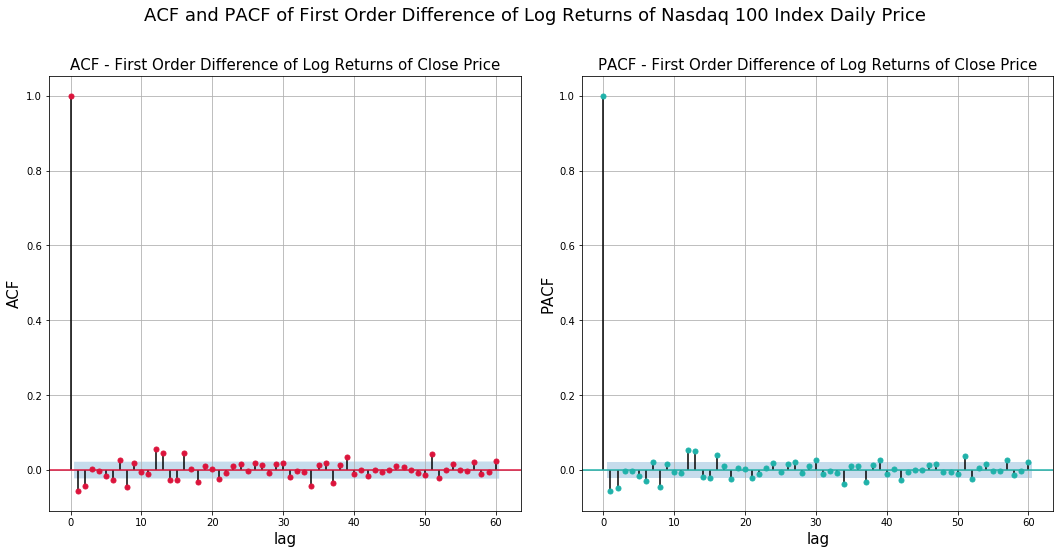

In [5]:
# Display Summary Statistics, Price Charts and ACF & PACF Plots for Price, Price Difference and Log Returns
for i in range(len(security_list)):
    print("\n********************************* Processing", security_list[i], "*********************************")

    df = data_reader(data_dir + file_list[i]).dropna()
    df_diff = df.diff().dropna()
    df_diff_log_returns = np.log(df).diff().dropna()
    describe_and_peek(df, security_list[i])

    # Price
    display_price_charts(df, security_list[i], "", "USD")
    plot_acf_pacf(df[['Close']], security_list[i], "")

    # First Order Difference of Price
    display_price_charts(df_diff, security_list[i], "First Order Difference of ", "USD")
    plot_acf_pacf(df_diff[['Close']], security_list[i], "First Order Difference of ")

    # First Order Difference of Daily Logarithmic Return
    display_price_charts(df_diff_log_returns, security_list[i], "First Order Difference of Log Returns of ", "%")
    plot_acf_pacf(df_diff_log_returns[['Close']], security_list[i], "First Order Difference of Log Returns of ")